# Data analysis on diabetes dataset

[__Link__](https://nbviewer.jupyter.org/github/mqchua/ML_project_1/blob/master/main.ipynb) to notebook

[__Link__](https://www.kaggle.com/uciml/pima-indians-diabetes-database) to dataset
 
## Contents

1. Exploratory Data Analysis
2. Data Visualization
3. Predictive Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE, RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, classification_report

warnings.filterwarnings('ignore')


df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# shape of df

df.shape

(768, 9)

In [4]:
# check for null values

df.isna().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# 1. Exploratory Data Analysis

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Replace 0 with NaN

In [7]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_to_replace] = df[cols_to_replace].replace(0, np.NaN)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Impute mean

In [8]:
for i in cols_to_replace:
    df[i].fillna(df[i].mean(), inplace = True) # Impute mean

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 2. Data Visualization

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 2.1 Diabetes Count using Plotly

In [10]:
# labels
diabetes_label = df['Outcome'].value_counts().keys().tolist() 

# count
diabetes_count = df['Outcome'].value_counts().values.tolist()

data = go.Pie(labels = ['Non-Diabetic', 'Diabetic'],
              values = diabetes_count,
              marker = dict(colors = ['skyblue', 'pink'], 
                            line = dict( color = "white", width = 2)),
              rotation = 90,
              hoverinfo = "label+value+text",
              hole = .5
             )

layout = go.Layout(dict(title = "Diabetes Count",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

fig = go.Figure(data = data, layout = layout)
fig.show()

### 2.2 Seperate Diabetics/ Non-Diabetics

In [11]:
diabetics = df[df['Outcome'] == 1]
non_diabetics = df[df['Outcome'] == 0]

### Histogram using Plotly

In [12]:
def histo_plot(column):
    trace1 = go.Histogram(x = diabetics[column],
                          histnorm = "percent",
                          name = "Diabetics",
                          marker = dict(line = dict(width = 0.6,
                                                   color = "black"
                                                   )
                                       ),
                          opacity = .8,
                          marker_color = "#EE7F77"
                         )
    
    trace2 = go.Histogram(x = non_diabetics[column],
                          histnorm = "percent",
                          name = "Non - Diabetics",
                          marker = dict(line = dict(width = 0.6,
                                                   color = "black"
                                                   )
                                       ),
                          opacity = .8,
                          marker_color = '#A0BDF0'
                         )
    
    data = [trace1, trace2]
    
    layout = go.Layout(dict(title = column + " Distribution",
                            plot_bgcolor = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                         ),
                             yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                          title = "percent",
                                          zerolinewidth=1,
                                          ticklen=5,
                                          gridwidth=2
                                         )
                           )
                      )
    fig = go.Figure(data = data, layout = layout)
    fig.show()

### Plot separated by Diabetics/ Non-Diabetics

In [13]:
histo_loop = [i for i in df.columns if i not in ['Outcome']]

for i in histo_loop: # loop to plot all histogram charts
    histo_plot(i)

### 2.3 Plot all entries

In [14]:
def histo_combined(column):
    data = go.Histogram(x = df[column],
                        histnorm = "percent",
                        name = "",
                        marker = dict(line = dict(width = 0.6,
                                                 color = "black")
                                    ),
                        opacity = .8,
                        marker_color = '#A0BDF0'
                       )
    
    layout = go.Layout(dict(title = column + " Distribution",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            )
                           )
                      )
    fig = go.Figure(data = data, layout = layout)
    
    fig.show()

In [15]:
combined_loop = [i for i in df.columns if i not in ['Outcome']]

for i in combined_loop: 
    histo_combined(i)

### 2.4 Plot for Age

In [16]:
# binning data for better visualization

age21_30 = df.Age[(df.Age <= 30) & (df.Age >= 20)] 
age31_40 = df.Age[(df.Age <= 40) & (df.Age >= 31)]
age41_50 = df.Age[(df.Age <= 50) & (df.Age >= 41)]
age51_60 = df.Age[(df.Age <= 60) & (df.Age >= 51)]
age61_70 = df.Age[(df.Age <= 70) & (df.Age >= 61)]
age71above = df.Age[df.Age >= 71]

colors = ['#F1A1DB','#C2B7F7','#85CCFE','#41DBEF','#30E5CE','#69EAA3']


fig = go.Figure(data=[go.Bar(
    x=["21-30","31-40","41-50", "51-60","61-70", "71+"],
    y=[age21_30.value_counts().sum(),len(age31_40 .values),len(age41_50.values),len(age51_60.values),len(age61_70.values),len(age71above.values)],
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Distribution by Age Group')

fig.show()

### 2.5 Pairplot using seaborn

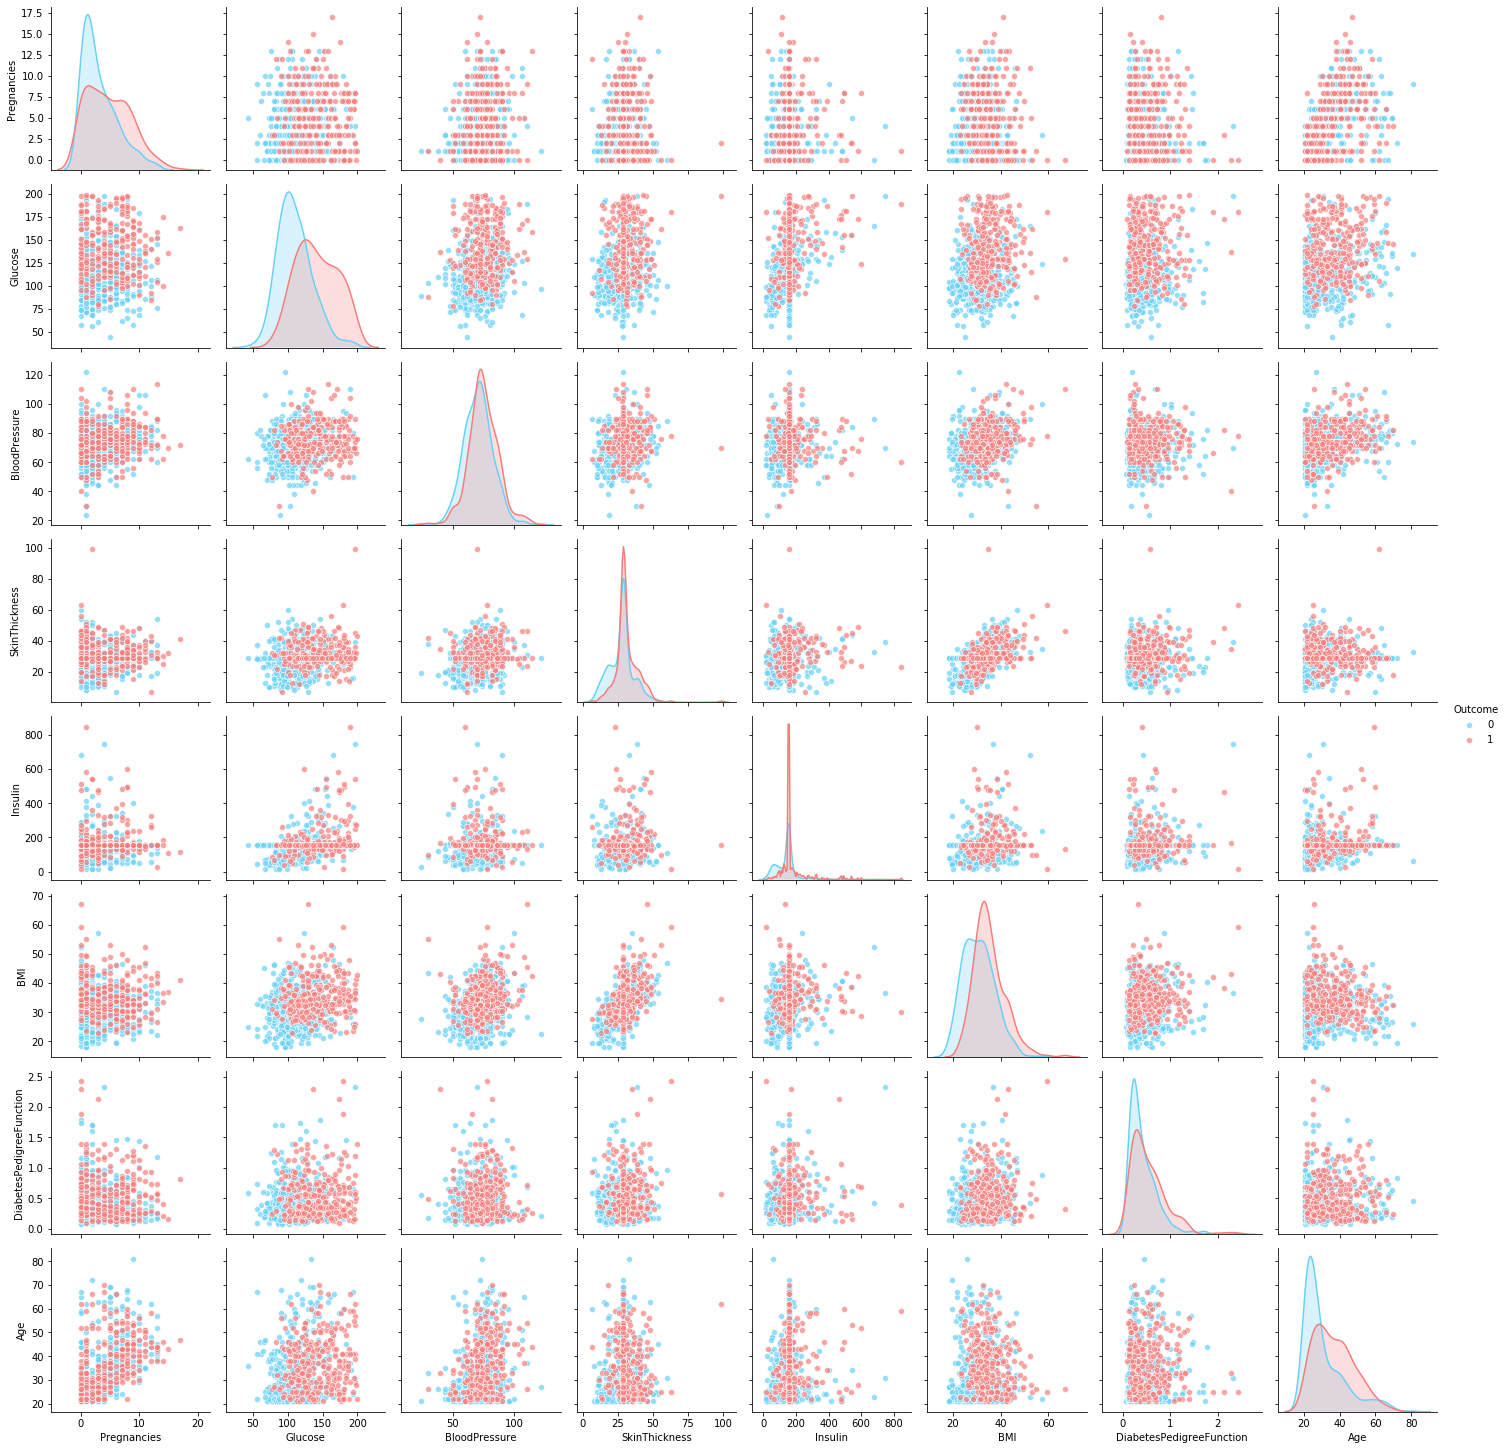

In [17]:
color_palette = { 0:'#67D1F8', 1:'#F57E7C'}

g = sns.pairplot(df, hue = "Outcome", palette = color_palette, plot_kws={'alpha':0.7})

# for saving image
# plt.savefig('PP.png', dpi = 200)

### 2.6 Box plot

In [18]:
import plotly.express as px

df_cols = df.drop('Outcome', axis = 1)
df_target = df['Outcome']


# Z score normalization
df_normalized = (df_cols - df_cols.mean()) / (df_cols.std())
df_combined = pd.concat([df_normalized, df_target], axis = 1)
df_box = pd.melt(df_combined, id_vars = 'Outcome', var_name = "features", value_name = 'values')


fig = px.box(df_box, x="features", y="values", color="Outcome", color_discrete_map={
                0: '#A0BDF0',
                1: '#EE7F77',
                }
            )
fig.update_layout({
'plot_bgcolor': 'rgba(243, 243, 243, 243)',
'paper_bgcolor': 'rgba(243, 243, 243, 243)',
"title": {"text": "Z-normalized Box Plot"}
})

fig.update_xaxes(title= "")
fig.update_yaxes(title= "")
             
fig.show()

### 2.7 Correlation matrix

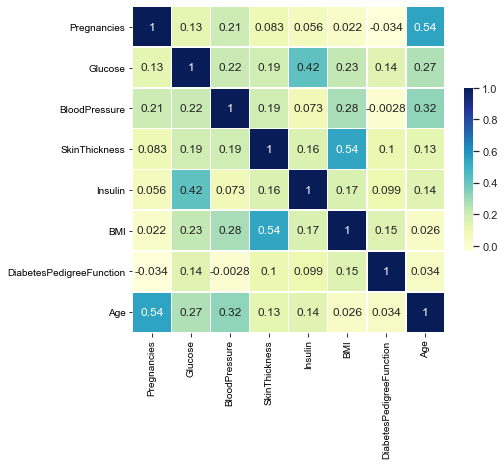

In [19]:
df_cols = df.drop('Outcome', axis = 1)
df_target = df['Outcome']

correlation = df_cols.corr()

# plotting

plt.subplots(figsize=(7, 6))
sns.set(font_scale = 1.0)
sns.heatmap(correlation, annot=True, linewidths= 0.5, cmap = 'YlGnBu', cbar_kws={"shrink": .5})
plt.show()

### 2.8 Jointplot

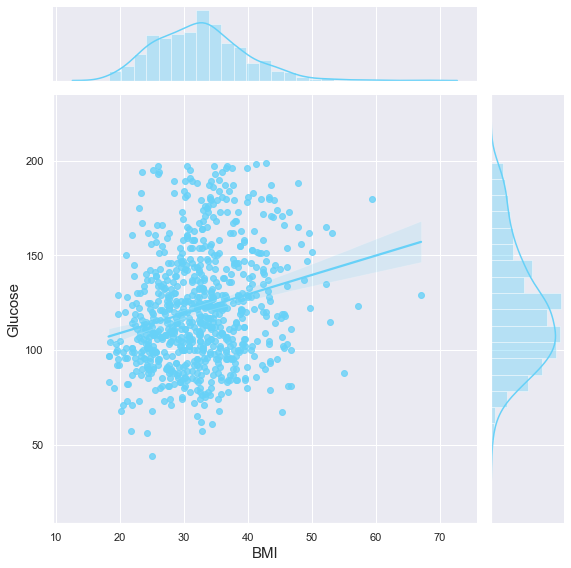

In [20]:
# Relationship between BMI & Glucose

j_plot = sns.jointplot(df['BMI'], df['Glucose'], kind = "reg", color = '#67D1F8', size = 8)
j_plot.set_axis_labels('BMI', 'Glucose', fontsize = 15)

plt.show()

# 3. Predictive Modelling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_cols, df_target, test_size= 0.3, random_state = 2)

### Use pipeline to determine best estimator

In [22]:
# Initialize pipeline 
pipe = Pipeline([("classifier", LogisticRegression())])

grid_param = [
    
    {
        "classifier": [LogisticRegression()]
    },
    {
        "classifier": [RandomForestClassifier()]
    },
    {
        "classifier": [SVC()]
    },
    {
        "classifier": [GaussianNB()]
    },
    {
        "classifier": [DecisionTreeClassifier()]
    }
]

### Ranked by Gridsearch accuracy

In [23]:
# Use GridSearchCV to search for best classifier

grid_obj = GridSearchCV(pipe, grid_param, n_jobs = -1, scoring = 'accuracy', cv=KFold(5))
grid_fit = grid_obj.fit(X_train, y_train)

cv_results = grid_fit.cv_results_

scores_df = pd.DataFrame(cv_results).sort_values(by = 'rank_test_score')
scores_df[['rank_test_score', 'params', 'mean_test_score']]

rank_test_score                                             params  \
0                1  {'classifier': LogisticRegression(C=1.0, class...   
3                2  {'classifier': GaussianNB(priors=None, var_smo...   
1                3  {'classifier': RandomForestClassifier(bootstra...   
2                4  {'classifier': SVC(C=1.0, break_ties=False, ca...   
4                5  {'classifier': DecisionTreeClassifier(ccp_alph...   

   mean_test_score  
0         0.769228  
3         0.752458  
1         0.746833  
2         0.741260  
4         0.679751

In [24]:
# same logic
x = cross_val_score(LogisticRegression(), X_train, y_train, cv= KFold(5)) # gridsearch accuracy
x.mean()

0.769228106611284

### Logistic Regression is ranked best with a Model Accuracy of 76%.

In [25]:
# best_model params
best_model = grid_fit.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy) 

0.7662337662337663


### Classification report

In [26]:
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits = 5))

              precision    recall  f1-score   support

           0    0.78531   0.89677   0.83735       155
           1    0.70370   0.50000   0.58462        76

    accuracy                        0.76623       231
   macro avg    0.74451   0.69839   0.71098       231
weighted avg    0.75846   0.76623   0.75420       231



### Confusion matrix 

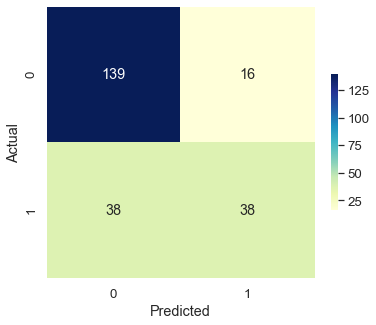

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot= True, fmt="d", cmap = 'YlGnBu', cbar_kws={"shrink": .5})

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Analysis of Logistic Regression model

__Recall__ : 50%

- Out of 76 actual positives, only 38 were predicted to have diabetes.

__Precision__ : 70%

- Out of 57 predicted positives, only 38 were predicted to have diabetes.

__Accuracy__ : 77%

- Out of 231 samples, 177 were predicted corectly.